In [2]:
import numpy as np
from antenna_environment import AntennaEnvironment
import matplotlib.pyplot as plt

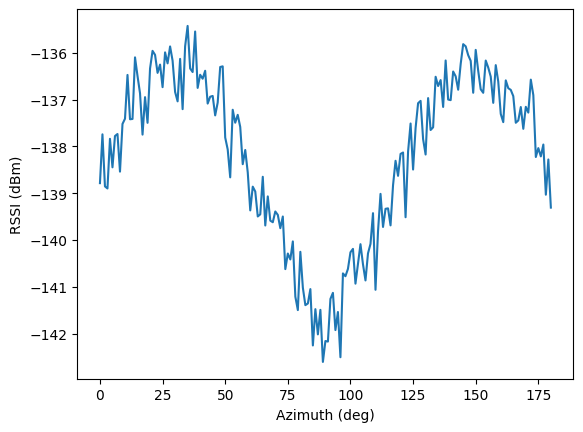

In [3]:
env = AntennaEnvironment(distance_m=200)

angles = np.arange(0, 181, 1)
rssi = [env._compute_rssi(theta=a, phi=0, samples=20) for a in angles]

plt.plot(angles, rssi)
plt.xlabel("Azimuth (deg)")
plt.ylabel("RSSI (dBm)")
plt.show()

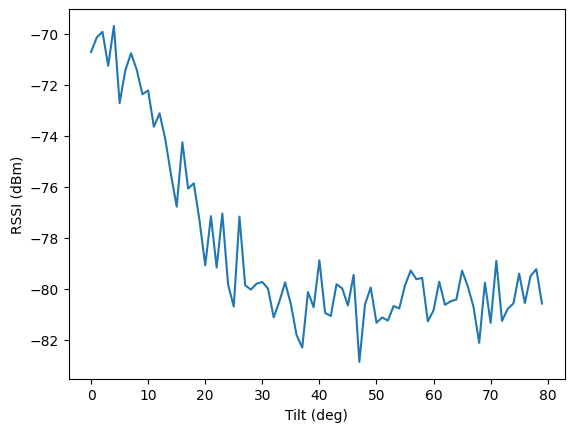

In [10]:
env = AntennaEnvironment(distance_m=200)

angles = np.arange(0, 80, 1)
rssi = [env.step(theta=90, phi=a) for a in angles]

plt.plot(angles, rssi)
plt.xlabel("Tilt (deg)")
plt.ylabel("RSSI (dBm)")
plt.show()

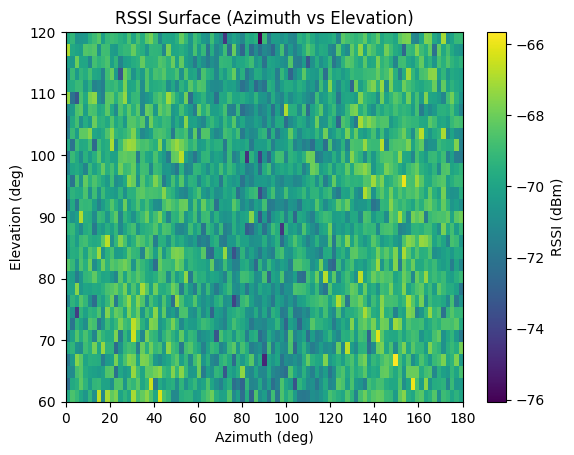

In [8]:
az = np.arange(0, 181, 2)  # pan
el = np.arange(60, 121, 2)  # tilt
RSSI = np.zeros((len(el), len(az)))

for i, phi in enumerate(el):
    for j, theta in enumerate(az):
        RSSI[i, j] = env.step(theta, phi, samples=5)

plt.figure()
plt.imshow(
    RSSI, extent=[0, 180, 60, 120], origin="lower", aspect="auto", cmap="viridis"
)
plt.colorbar(label="RSSI (dBm)")
plt.xlabel("Azimuth (deg)")
plt.ylabel("Elevation (deg)")
plt.title("RSSI Surface (Azimuth vs Elevation)")
plt.show()